In [18]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import my_plot_style as mps
#import numpy as np
import scipy.stats as ss
import statistics 
mps.my_plot_style()

# SDSS quasar spectra practice
### https://www.dropbox.com/s/emzrmm1hd86ihim/SDSS_QSO_spectra_short.fits?dl=0

In [6]:
data = pf.open('SDSS_QSO_spectra_short.fits')
spectra = data[0].data # spectra[i,j] i object and j pixel
inv = data[1].data # Inverse-variance of the data
wavelength = data[2].data # wavelength 

<ipython-input-7-e33be83de02b>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,2)


Text(0, 0.5, 'Normalized flux')

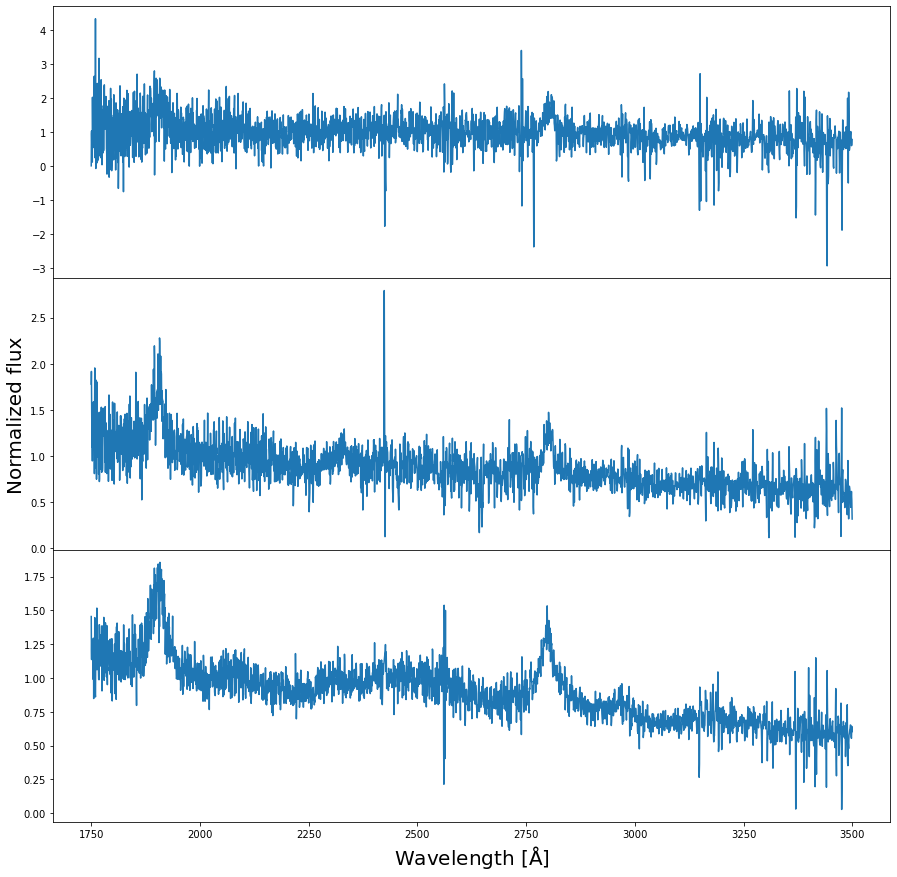

In [7]:
#len(spectra)
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0)
for i in range(0,3):
    plt.subplot(3,1,i+1)
    plt.plot(wavelength,spectra[i,:])
plt.xlabel('Wavelength [$\\rm \\AA$]',fontsize=20)
plt.subplot(3,1,2)
plt.ylabel('Normalized flux',fontsize=20)

# Exercise 1: Write a code to produce a composite spectrum (a combined spectrum), using each estimator:

mean 

median

sigma clipping 

inverse-variance weighted mean and 

geometric mean

### Feel free to use the developed library e.g. scipy


In [62]:
def sigma_clip_mean(y):
    return np.mean(ss.sigmaclip(y,4,4)[0])

In [63]:
def weighted_mean(y,weights):
    numerator = np.sum(y*weights)
    denominator = np.sum(weights)
    
    return numerator/denominator

In [71]:
### Code
n_pixel = len(wavelength)
composite_spectra = np.zeros((5, len(wavelength)))
for i_pixel in range(0,n_pixel):
    composite_spectra[0,i_pixel]=np.mean(spectra[:,i_pixel])    # mean 0
    composite_spectra[1,i_pixel]=np.median(spectra[:,i_pixel])  # median 1
    composite_spectra[2,i_pixel]=sigma_clip_mean(spectra[:,i_pixel])  # sigma clipping 2
    composite_spectra[3,i_pixel]=weighted_mean(spectra[:,i_pixel],inv[:,i_pixel])  # inverse-variance 3
    
    cut = spectra[:,i_pixel]>0
    composite_spectra[4,i_pixel]=ss.gmean(spectra[cut,i_pixel])  # geometric mean 4

(0.5, 2.5)

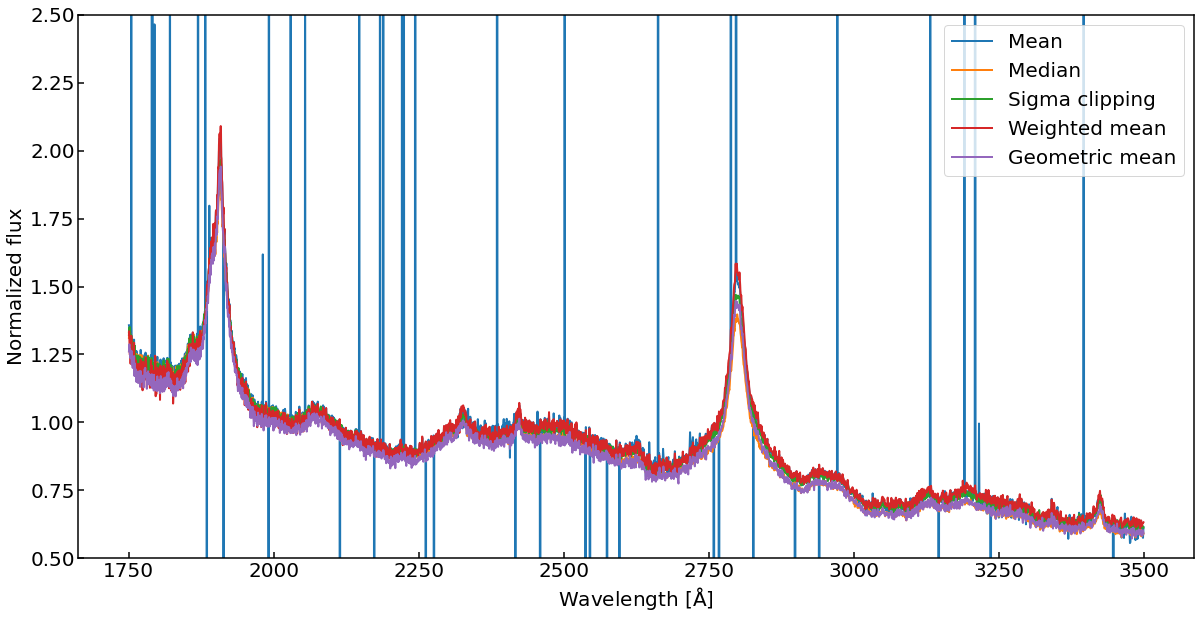

In [73]:
plt.figure(figsize=(20,10))
plt.plot(wavelength,composite_spectra[0,:],lw=2,label='Mean')
plt.plot(wavelength,composite_spectra[1,:],lw=2,label='Median')
plt.plot(wavelength,composite_spectra[2,:],lw=2,label='Sigma clipping')
plt.plot(wavelength,composite_spectra[3,:],lw=2,label='Weighted mean')
plt.plot(wavelength,composite_spectra[4,:],lw=2,label='Geometric mean')
plt.legend()
plt.xlabel('Wavelength [$\\rm \\AA$]',fontsize=20)
plt.ylabel('Normalized flux',fontsize=20)
plt.ylim(0.5,2.5)

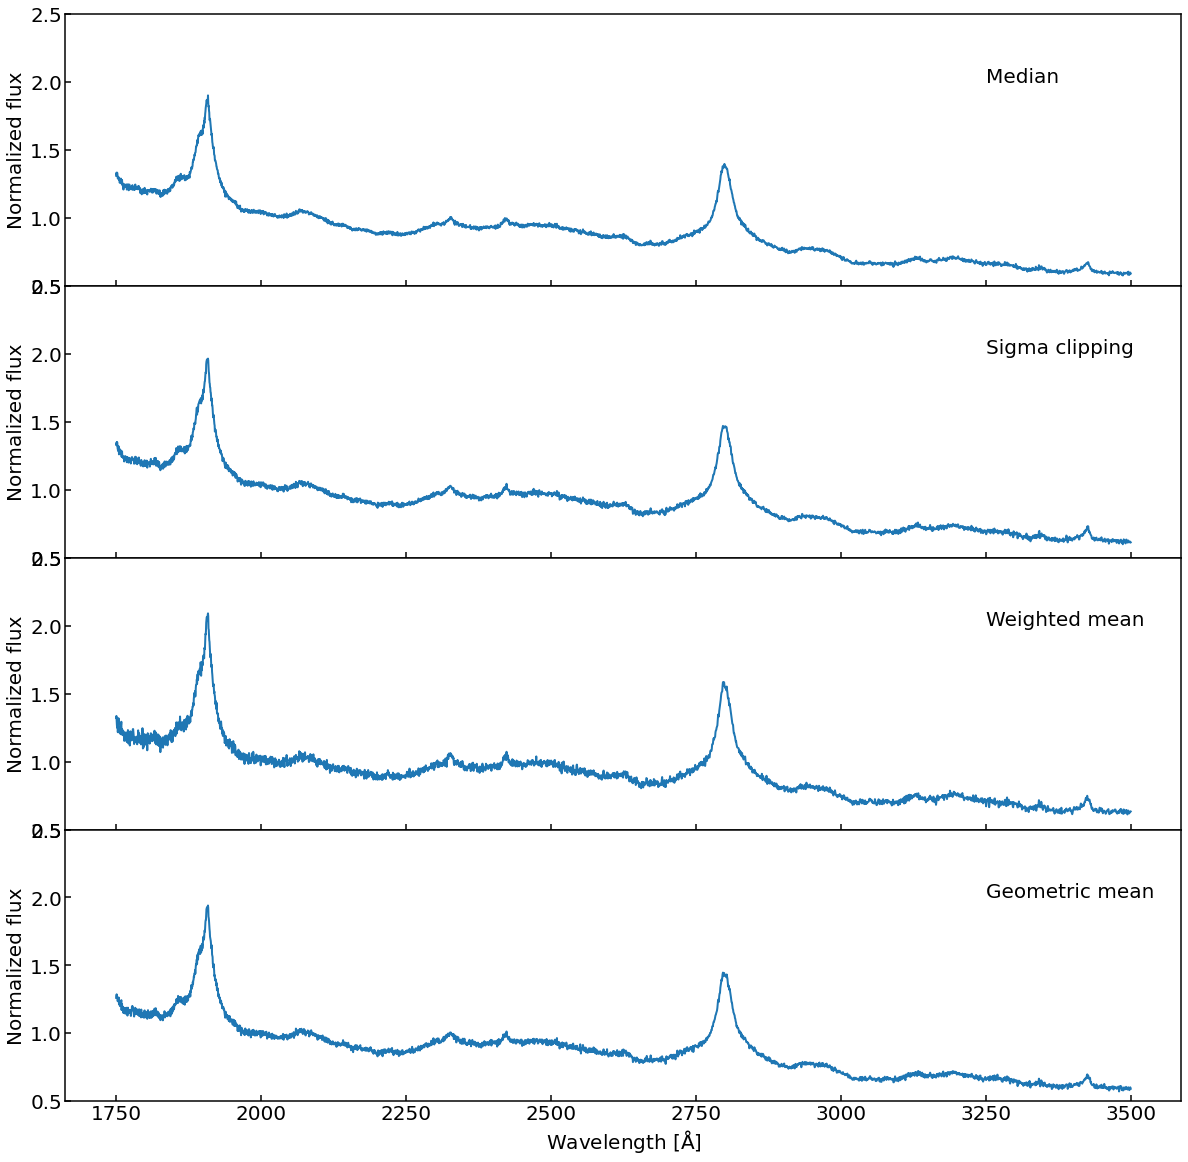

In [66]:
plt.figure(figsize=(20,20))
label_ = ['Median','Sigma clipping','Weighted mean','Geometric mean']
#plt.plot(wavelength,composite_spectra[0,:],lw=3)
#plt.text(3000,15,'Mean',fontsize=20)
plt.subplots_adjust(hspace=0)
for i in range(1,5):
    plt.subplot(4,1,i)
    
    plt.plot(wavelength,composite_spectra[i,:],lw=2)
    plt.text(3250,2.0,label_[i-1],fontsize=20)
    plt.xlabel('Wavelength [$\\rm \\AA$]',fontsize=20)
    plt.ylabel('Normalized flux',fontsize=20)

    plt.ylim(0.5,2.5)

# Exercise 2: 
### a. Use random generator to perform a simple simulation and demonstrate that 
### the error of the mean 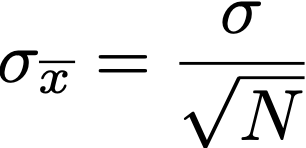

### b. Write a code to show (1) the bootstrap error is consistent with the theoretical value and (2) the bootstrap error as a function of bootstrap time.

# Gaussian / normal distribution
## $Prob(x) =\frac{1}{\sigma \sqrt(2\pi)} exp[-\frac{(x-\mu)^{2}}{2\sigma^{2}}]$

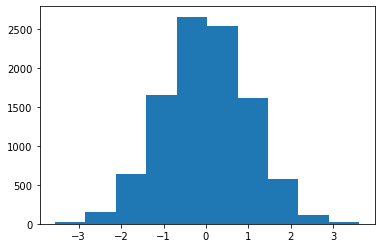

In [5]:
# a.
mu = 0
sigma = 1
n_point = 10000
random_data = np.random.normal(mu,sigma,n_point)
_ = plt.hist(random_data)

In [6]:
print('Mean = %0.3f' % (np.mean(random_data)))
print('the standard deviation=%0.3f' % (np.std(random_data)))
print('the error of the mean=%0.3f' % (np.std(random_data)/np.sqrt(len(random_data))))

Mean = 0.001
the standard deviation=1.003
the error of the mean=0.010


In [7]:
### You can run many simuations and look at the distribution of the mean and the standard deviation of the distribution

In [8]:
### b. Bootstrap code - using a single normal distribution dataset, 
### but randomly create new dataset from the original dataset and estimate the error of mean